In [1]:
! pip install kaggle

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

In [5]:
%cd /content/gdrive/My Drive/Kaggle

/content/gdrive/My Drive/Kaggle


In [6]:
!kaggle datasets download -d vencerlanz09/bottle-synthetic-images-dataset

 99% 1.25G/1.26G [00:30<00:00, 67.6MB/s]
100% 1.26G/1.26G [00:31<00:00, 43.4MB/s]


In [7]:
!unzip \*.zip

Streaming output truncated to the last 5000 lines.
  inflating: ImageClassesCombinedWithCOCOAnnotations/images_raw/00010001.jpg  
  inflating: ImageClassesCombinedWithCOCOAnnotations/images_raw/00010002.jpg  
  inflating: ImageClassesCombinedWithCOCOAnnotations/images_raw/00010003.jpg  
  inflating: ImageClassesCombinedWithCOCOAnnotations/images_raw/00010004.jpg  
  inflating: ImageClassesCombinedWithCOCOAnnotations/images_raw/00010005.jpg  
  inflating: ImageClassesCombinedWithCOCOAnnotations/images_raw/00010006.jpg  
  inflating: ImageClassesCombinedWithCOCOAnnotations/images_raw/00010007.jpg  
  inflating: ImageClassesCombinedWithCOCOAnnotations/images_raw/00010008.jpg  
  inflating: ImageClassesCombinedWithCOCOAnnotations/images_raw/00010009.jpg  
  inflating: ImageClassesCombinedWithCOCOAnnotations/images_raw/00010010.jpg  
  inflating: ImageClassesCombinedWithCOCOAnnotations/images_raw/00010011.jpg  
  inflating: ImageClassesCombinedWithCOCOAnnotations/images_raw/00010012.jpg  
 

In [8]:
import os
import PIL
import zipfile
import numpy as np
import tensorflow as tf
import shutil
import matplotlib.image as mpimg
import cv2
import matplotlib.pyplot as plt

from PIL import Image, ImageOps, ImageOps
from keras.models import load_model
from keras.preprocessing import image
from google.colab import files
from google.colab.patches import cv2_imshow
# from keras.src.engine import input_spec

In [9]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if len(device_name) > 0:
    print("Found GPU at: {}".format(device_name))
else:
    device_name = "/device:CPU:0"
    print("No GPU, using {}.".format(device_name))

Found GPU at: /device:GPU:0


In [10]:
dataset_dir = '/content/gdrive/My Drive/Kaggle/Bottle Images/Bottle Images/'
train_dir = os.path.join(dataset_dir, 'train')
validation_dir = os.path.join(dataset_dir, 'validation')

In [11]:
def to_grayscale_then_rgb(image):
    if image.shape[2] == 1:
      return image

    image = tf.image.rgb_to_grayscale(image)
    return image

In [12]:
image_datagen = image.ImageDataGenerator(
    rescale                 =   1./255,
    rotation_range          =   20,
    horizontal_flip         =   True,
    vertical_flip           =   True,
    shear_range             =   0.2,
    zoom_range              =   0.24,
    validation_split        =   0.2,
    preprocessing_function  =   to_grayscale_then_rgb

)

In [13]:
# prepare data train and validation
training_generator = image_datagen.flow_from_directory(
    dataset_dir,
    target_size             =   (150, 150),
    class_mode              =   'categorical',
    color_mode              =   'grayscale',
    subset                  =   'training'
)

validation_generator = image_datagen.flow_from_directory(
    dataset_dir,
    target_size             =   (150, 150),
    class_mode              =   'categorical',
    color_mode              =   'grayscale',
    subset                  =   'validation'
)


Found 20000 images belonging to 5 classes.
Found 5000 images belonging to 5 classes.


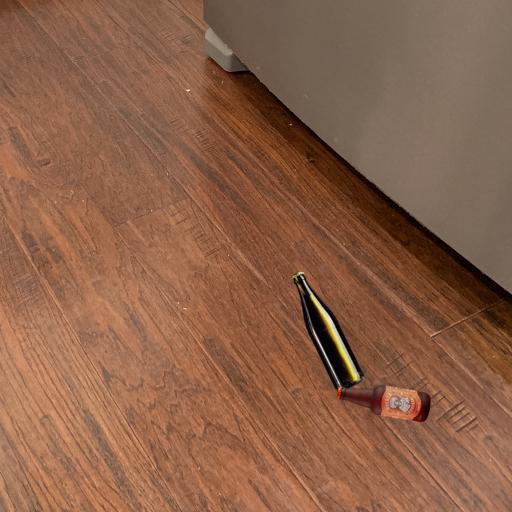

In [14]:
tf.keras.preprocessing.image.load_img('/content/gdrive/My Drive/Kaggle/Bottle Images/Bottle Images/Beer Bottles/00000001.jpg')

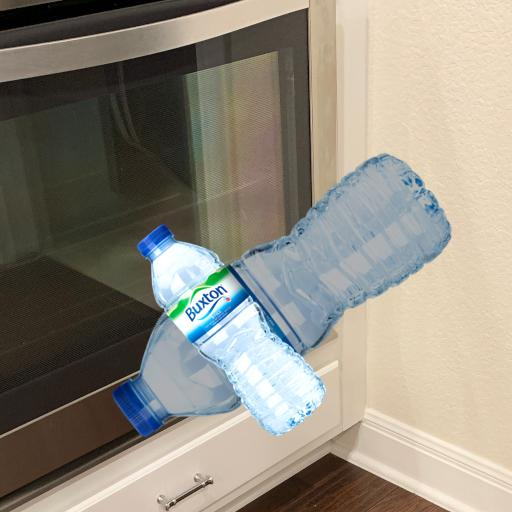

In [15]:
tf.keras.preprocessing.image.load_img('/content/gdrive/My Drive/Kaggle/Bottle Images/Bottle Images/Plastic Bottles/00000001.jpg')

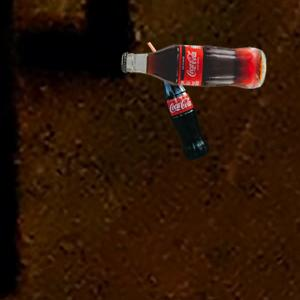

In [16]:
tf.keras.preprocessing.image.load_img('/content/gdrive/My Drive/Kaggle/Bottle Images/Bottle Images/Soda Bottle/00000001.jpg')

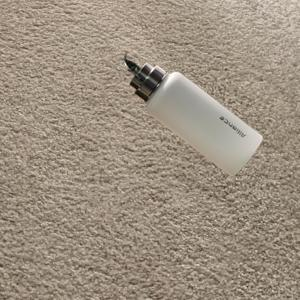

In [17]:
tf.keras.preprocessing.image.load_img('/content/gdrive/My Drive/Kaggle/Bottle Images/Bottle Images/Water Bottle/00000001.jpg')

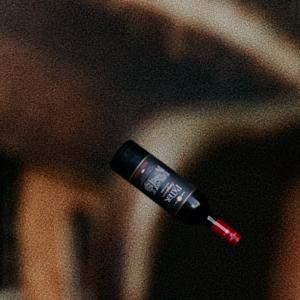

In [18]:
tf.keras.preprocessing.image.load_img('/content/gdrive/My Drive/Kaggle/Bottle Images/Bottle Images/Wine Bottle/00000001.jpg')

In [19]:
class MyCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs = {}):
    if (logs.get('acc') > 0.93):
      print('\nAkurasi mencapai 93%')
      self.model.stop_training = True

callback = MyCallback()

In [20]:
model = tf.keras.models.Sequential([

    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 1)),
    tf.keras.layers.MaxPooling2D(3, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(346, 1, activation='relu'),
    tf.keras.layers.MaxPooling2D(2,1),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

In [21]:
model.compile(
    metrics           =   ['acc'],
    loss              =   'categorical_crossentropy',
    optimizer         =   'adam'
)

In [22]:
r = model.fit(
    training_generator,
    validation_data   =   validation_generator,
    epochs            =   40,
    batch_size        =   5,
    callbacks         =   [callback]
)

Epoch 1/40
625/625 [==============================] - 138s 207ms/step - loss: 1.3270 - acc: 0.4137 - val_loss: 1.1441 - val_acc: 0.5148
Epoch 2/40
625/625 [==============================] - 124s 199ms/step - loss: 1.0241 - acc: 0.5745 - val_loss: 0.9556 - val_acc: 0.6080
Epoch 3/40
625/625 [==============================] - 122s 195ms/step - loss: 0.8488 - acc: 0.6597 - val_loss: 0.7854 - val_acc: 0.7058
Epoch 4/40
625/625 [==============================] - 123s 197ms/step - loss: 0.7085 - acc: 0.7271 - val_loss: 0.6481 - val_acc: 0.7566
Epoch 5/40
625/625 [==============================] - 120s 192ms/step - loss: 0.6133 - acc: 0.7704 - val_loss: 0.5710 - val_acc: 0.7900
Epoch 6/40
625/625 [==============================] - 121s 193ms/step - loss: 0.5294 - acc: 0.7997 - val_loss: 0.5628 - val_acc: 0.7940
Epoch 7/40
625/625 [==============================] - 120s 192ms/step - loss: 0.4662 - acc: 0.8313 - val_loss: 0.5274 - val_acc: 0.8018
Epoch 8/40
625/625 [============================

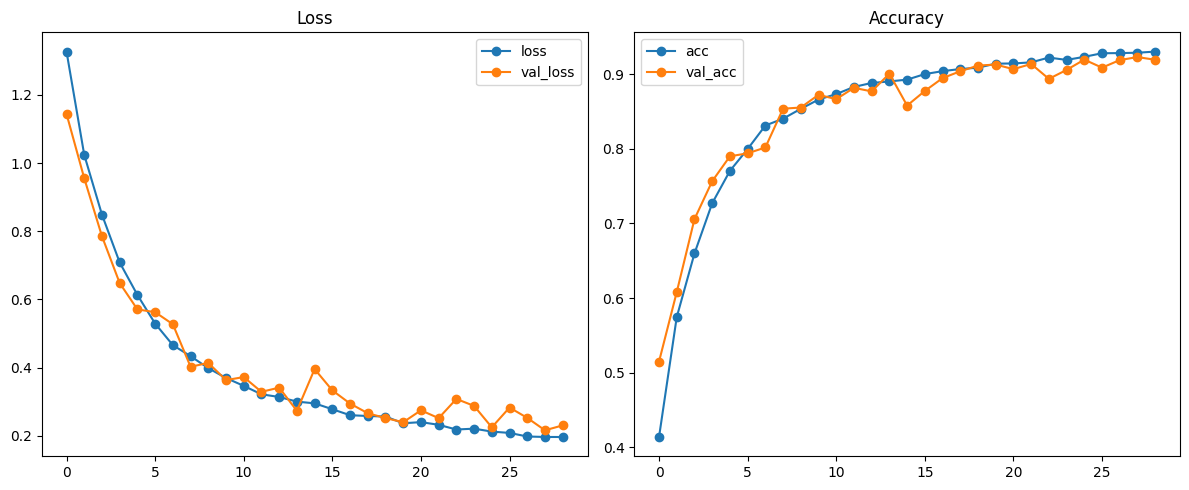

In [23]:
# Create a figure with two subplots
plt.figure(figsize=(12, 5))

# Subplot for loss
plt.subplot(1, 2, 1)
plt.plot(r.history['loss'], label='loss', marker='o')
plt.plot(r.history['val_loss'], label='val_loss', marker='o')
plt.legend()
plt.title('Loss')

# Subplot for accuracy
plt.subplot(1, 2, 2)
plt.plot(r.history['acc'], label='acc', marker='o')
plt.plot(r.history['val_acc'], label='val_acc', marker='o')
plt.legend()
plt.title('Accuracy')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


In [27]:
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
    # predicting images
    path = fn
    img = image.load_img(path, target_size=(150, 150))

    # Convert the image to grayscale
    x_gray = tf.image.rgb_to_grayscale(img)
    x_gray = tf.image.resize(x_gray, (150, 150))
    x_gray = tf.expand_dims(x_gray, axis=0)

    print("Input shape:", x_gray.shape)

    # Make predictions using the model
    classes = model.predict(x_gray)
    predicted_class = np.argmax(classes)
    print("Predicted classes:", predicted_class)


Saving cocacola.jpg to cocacola (1).jpg
Input shape: (1, 150, 150, 1)
1/1 [==============================] - 0s 17ms/step
Predicted classes: 0


In [29]:
# Save the model in TF-Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TF-Lite model to a file
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)